In [78]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Data preprocessing

In [79]:
yields = pd.read_csv('SoyabeanData_2.csv', sep=";", header=0)
yields.head()

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1
0,Anuppur,2011,0.411731,0.358452,0.434819,0.524131,0.677431,0.593383,0.477271,0.567954,...,301.6111,302.9698,302.2573,7.769389,9.348433,14.452800,11.880410,0.821737,0.000000,0.402314
1,Ashoknagar,2011,1.178221,0.241188,0.362600,0.558422,0.523131,0.372065,0.335345,0.265376,...,305.5666,310.7607,306.9396,7.901649,13.023700,8.544753,7.204936,0.000000,0.008637,1.280708
2,Balaghat,2011,1.689655,0.456175,0.475566,0.523964,0.770839,0.696958,0.604985,0.837754,...,301.2737,301.9403,301.2473,6.776612,10.918880,19.803910,8.513394,0.416651,0.106264,1.741935
3,Barwani,2011,0.348127,0.182870,0.238343,0.455436,0.552991,0.440660,0.352182,0.209792,...,304.8209,309.9328,310.0919,3.338540,8.796704,12.733880,4.721150,0.401590,0.090122,0.286952
4,Betul,2011,1.268837,0.382777,0.331046,0.488085,0.670948,0.574909,0.476967,0.613691,...,302.7792,306.1960,305.7217,4.863829,11.915620,12.159300,8.255394,0.297665,0.130278,1.095832


In [80]:
yields.describe()  

,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,LAI_JUL,...,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2015.000000,0.962937,0.292348,0.354946,0.534898,0.584063,0.486246,0.444078,0.434664,0.531422,...,304.382940,307.120350,304.539844,4.495816,13.271076,11.612374,6.446472,0.916025,0.113456,1.000728
std,2.585113,0.397603,0.063082,0.099951,0.079340,0.079837,0.100630,0.073243,0.190966,0.223911,...,1.978491,3.060516,2.134288,2.917224,4.099174,4.274359,3.942961,0.970080,0.131197,0.406468
min,2011.000000,0.068565,0.108369,0.104135,0.270925,0.361784,0.297160,0.280770,0.191828,0.134593,...,298.935300,300.396300,299.498100,0.299988,4.604396,2.782477,0.768566,0.000000,0.000000,0.000000
25%,2013.000000,0.659873,0.246086,0.285473,0.482946,0.532201,0.401934,0.392555,0.286957,0.364036,...,302.973000,304.699875,303.131225,2.641231,10.351730,7.982872,4.120147,0.248135,0.002829,0.690490
50%,2015.000000,0.926265,0.286918,0.354143,0.542652,0.589512,0.476745,0.435697,0.387259,0.506229,...,304.468900,307.343750,304.613850,3.918305,12.805555,11.017470,5.506100,0.587589,0.066092,0.991482
75%,2017.000000,1.264069,0.327423,0.434860,0.598062,0.639045,0.558202,0.490466,0.544367,0.658378,...,305.638075,309.525450,305.998250,5.627472,15.580348,14.667365,7.398980,1.239085,0.199284,1.297746
max,2019.000000,2.488515,0.516840,0.593550,0.686390,0.790756,0.760128,0.685336,1.283500,1.248005,...,309.566300,313.578300,310.091900,17.556680,27.128330,23.176880,24.664330,5.698166,0.784512,2.488515


In [81]:
def test(yields):
    if yields <= 0.926265:
        return 'bad'
    else:
        return 'good'


In [82]:
yields["YIELDS"] = yields['YIELD'].map(test)
yields["YIELDS_N1"] = yields['YIELD_N1'].map(test)
yields.head()                                         

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1,YIELDS,YIELDS_N1
0,Anuppur,2011,0.411731,0.358452,0.434819,0.524131,0.677431,0.593383,0.477271,0.567954,...,302.2573,7.769389,9.348433,14.452800,11.880410,0.821737,0.000000,0.402314,bad,bad
1,Ashoknagar,2011,1.178221,0.241188,0.362600,0.558422,0.523131,0.372065,0.335345,0.265376,...,306.9396,7.901649,13.023700,8.544753,7.204936,0.000000,0.008637,1.280708,good,good
2,Balaghat,2011,1.689655,0.456175,0.475566,0.523964,0.770839,0.696958,0.604985,0.837754,...,301.2473,6.776612,10.918880,19.803910,8.513394,0.416651,0.106264,1.741935,good,good
3,Barwani,2011,0.348127,0.182870,0.238343,0.455436,0.552991,0.440660,0.352182,0.209792,...,310.0919,3.338540,8.796704,12.733880,4.721150,0.401590,0.090122,0.286952,bad,bad
4,Betul,2011,1.268837,0.382777,0.331046,0.488085,0.670948,0.574909,0.476967,0.613691,...,305.7217,4.863829,11.915620,12.159300,8.255394,0.297665,0.130278,1.095832,good,good


In [83]:
yields["DISTRICT"] = yields["DISTRICTS"].astype('category').cat.codes
yields.head()

,DISTRICTS,YEAR,YIELD,NDVI_JUN,NDVI_JUL,NDVI_AUG,NDVI_SEP,NDVI_OCT,NDVI_NOV,LAI_JUN,...,RF_JUN,RF_JUL,RF_AUG,RF_SEP,RF_OCT,RF_NOV,YIELD_N1,YIELDS,YIELDS_N1,DISTRICT
0,Anuppur,2011,0.411731,0.358452,0.434819,0.524131,0.677431,0.593383,0.477271,0.567954,...,7.769389,9.348433,14.452800,11.880410,0.821737,0.000000,0.402314,bad,bad,0
1,Ashoknagar,2011,1.178221,0.241188,0.362600,0.558422,0.523131,0.372065,0.335345,0.265376,...,7.901649,13.023700,8.544753,7.204936,0.000000,0.008637,1.280708,good,good,1
2,Balaghat,2011,1.689655,0.456175,0.475566,0.523964,0.770839,0.696958,0.604985,0.837754,...,6.776612,10.918880,19.803910,8.513394,0.416651,0.106264,1.741935,good,good,2
3,Barwani,2011,0.348127,0.182870,0.238343,0.455436,0.552991,0.440660,0.352182,0.209792,...,3.338540,8.796704,12.733880,4.721150,0.401590,0.090122,0.286952,bad,bad,3
4,Betul,2011,1.268837,0.382777,0.331046,0.488085,0.670948,0.574909,0.476967,0.613691,...,4.863829,11.915620,12.159300,8.255394,0.297665,0.130278,1.095832,good,good,4


In [84]:
y = yields[["YIELDS"]]     
X = yields[['LST_JUN', 'LST_JUL', 'LST_AUG', 'LST_SEP', "LST_OCT", "LST_NOV", "RF_JUN", "RF_JUL", "RF_AUG",'RF_SEP', 'YIELD_N1', 'DISTRICT']]
X.head()

,LST_JUN,LST_JUL,LST_AUG,LST_SEP,LST_OCT,LST_NOV,RF_JUN,RF_JUL,RF_AUG,RF_SEP,YIELD_N1,DISTRICT
0,315.7290,304.0972,301.9496,301.6111,302.9698,302.2573,7.769389,9.348433,14.452800,11.880410,0.402314,0
1,317.0000,306.4323,302.1003,305.5666,310.7607,306.9396,7.901649,13.023700,8.544753,7.204936,1.280708,1
2,313.1215,301.4853,301.6021,301.2737,301.9403,301.2473,6.776612,10.918880,19.803910,8.513394,1.741935,2
3,315.8745,307.2567,302.0137,304.8209,309.9328,310.0919,3.338540,8.796704,12.733880,4.721150,0.286952,3
4,314.4321,304.1040,301.0947,302.7792,306.1960,305.7217,4.863829,11.915620,12.159300,8.255394,1.095832,4


# Machine learning

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=10) 
print('Test set', X_test.shape)
print('Train set', X_train.shape)

Test set (42, 12)
Train set (372, 12)


In [86]:
model = KNeighborsClassifier(n_neighbors=4)

In [87]:
model.fit(X_train, y_train.values.ravel())    
print(model.score(X_train, y_train.values.ravel()))

0.7876344086021505


In [88]:
model.score(X_test, y_test)  

0.6190476190476191

In [89]:
cross_val_score(KNeighborsClassifier(3), X_train, y_train.values.ravel(), cv=5, scoring='accuracy').mean()

0.6479999999999999

0.672190611664296


array([0.67219061, 0.63968706, 0.64530583, 0.63961593, 0.64793741,
       0.62887624, 0.60248933, 0.61571835, 0.60768137, 0.60476529,
       0.59423898, 0.61827881, 0.62894737, 0.61543385, 0.59943101,
       0.60476529, 0.60504979, 0.60761024, 0.60220484, 0.60220484,
       0.61301565, 0.59957326, 0.59672831, 0.60490754, 0.61827881,
       0.62368421, 0.60775249, 0.6185633 , 0.61052632, 0.61045519,
       0.61842105, 0.61315789, 0.62112376, 0.6158606 , 0.61842105,
       0.61564723, 0.63449502, 0.62375533, 0.61031294, 0.62660028,
       0.61863442, 0.62660028, 0.61578947, 0.61849218, 0.61059744,
       0.60512091, 0.6158606 , 0.62389758, 0.6158606 , 0.62375533,
       0.61564723, 0.61571835, 0.5997155 , 0.60768137, 0.59950213,
       0.61024182, 0.6101707 , 0.61024182, 0.61294452, 0.6128734 ,
       0.61834993, 0.61827881, 0.61571835, 0.62112376, 0.61045519,
       0.60497866, 0.5970128 , 0.5997155 , 0.59964438, 0.59964438,
       0.60768137, 0.5970128 , 0.60248933, 0.59708393, 0.60512

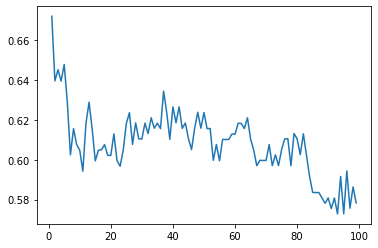

In [90]:
k = np.arange(1, 100)

train_score, val_score = validation_curve(model, X_train, y_train.values.ravel(), param_name="n_neighbors", param_range=k, cv=10)



plt.plot(k,val_score.mean(axis=1))


print(val_score.mean(axis=1).max())

val_score.mean(axis=1)


In [91]:
param_grid = {'n_neighbors': np.arange(1,20), 'metric':['euclidean', 'manhattan']}
        
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)

grid.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [92]:
grid.best_score_

0.6960170697012803

In [93]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 3}

In [94]:
model_best = grid.best_estimator_

In [95]:
model_best.score(X_test, y_test)

0.7857142857142857

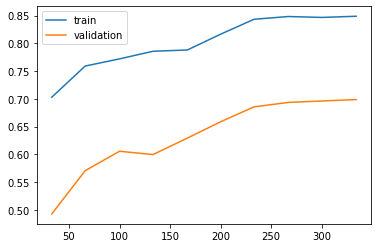

In [96]:
N, train_score, val_score = learning_curve(model_best, X_train, y_train.values.ravel(), train_sizes = np.linspace(0.1, 1.0, 10), cv=10)  

plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.legend()

# Function to predict yield

In [97]:
LST_JUN = float(input("LST_JUN : "))
LST_JUL = float(input("LST_JUL : "))
LST_AUG = float(input("LST_AUG : "))
LST_SEP = float(input("LST_SEP : "))
LST_OCT = float(input("LST_OCT : "))
LST_NOV = float(input("LST_NOV : "))

RF_JUN = float(input("RF_JUN : "))
RF_JUL = float(input("RF_JUL : "))
RF_AUG = float(input("RF_AUG : "))
RF_SEP = float(input("RF_SEP : "))

YIELD_N1 = float(input("YIELD_N1 : "))
DISTRICT = int(input("DISTRICT : "))

def Yield_Prediction(model_best, LST_JUN=LST_JUN, LST_JUL=LST_JUL, LST_AUG=LST_AUG, LST_SEP=LST_SEP, LST_OCT=LST_OCT, LST_NOV=LST_NOV, RF_JUN=RF_JUN, RF_JUL=RF_JUL, RF_AUG=RF_AUG, RF_SEP=RF_SEP, YIELD_N1=YIELD_N1, DISTRICT=DISTRICT):
    x = np.array([LST_JUN, LST_JUL, LST_AUG, LST_SEP, LST_OCT, LST_NOV, RF_JUN, RF_JUL, RF_AUG, RF_SEP, YIELD_N1, DISTRICT]).reshape(1, 12)
    print('Based on the features entered, the model predicts that the yield will be', model_best.predict(x))
    print('Here is the probability that this prediction is correct: ',model_best.predict_proba(x).max()*100, "%")
    
Yield_Prediction(model_best)

LST_JUN : 300
LST_JUL : 300
LST_AUG : 300
LST_SEP : 300
LST_OCT : 300
LST_NOV : 300
RF_JUN : 10
RF_JUL : 15
RF_AUG : 25
RF_SEP : 1
YIELD_N1 : 1
DISTRICT : 2
Based on the features entered, the model predicts that the yield will be ['bad']
Here is the probability that this prediction is correct:  66.66666666666666 %


C:\Users\tompo\anaco\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\tompo\anaco\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
